# How mental health varies in tech between genders due to different variable

In [331]:
import sys 
!conda install --yes --prefix {sys.prefix} numpy 

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

Solving environment: ...working... done

# All requested packages already installed.



# Load and Check Data

In [332]:
df=pd.read_csv(r"C:\Users\stacie-jade\Documents\survey.csv.csv") #loading my csv file

In [333]:
df.head() #to check that the dataframe was loaded

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


        This dataset contains the following data:

- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

In [334]:
df.info() #to see what was within the dataframe on a smaller scale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# filling missing values

In [335]:
df[df.isnull()] #shows that there are null values

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
df.fillna("No") #to fill the null values with an appropriate value
df.isnull().any() #to check if the fill had worked and to see what might need further cleaning

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [337]:
df.columns[df.isnull().any()] #to get a list of all the columns that needed to be cleaned

Index(['state', 'self_employed', 'work_interfere', 'comments'], dtype='object')

In [338]:
df[['state', 'self_employed', 'work_interfere', 'comments']] = df[['state', 'self_employed', 'work_interfere', 'comments']].fillna("No")
df[['state', 'self_employed', 'work_interfere', 'comments']].isnull().any() #to check if they had been filled fully 

state             False
self_employed     False
work_interfere    False
comments          False
dtype: bool

In [339]:
df.head() #to show that all missing values were filled

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,No,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No


# Analysing Data

In [340]:
#to group the columns i wanted to work with
df.groupby(['Timestamp','Age','Gender','self_employed','family_history','treatment','obs_consequence']).sum()

,,,,,,,Country,state,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,comments
Timestamp,Age,Gender,self_employed,family_history,treatment,obs_consequence,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,No,No,Yes,No,United States,IL,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2014-08-27 11:29:37,44,M,No,No,No,No,United States,IN,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2014-08-27 11:29:44,32,Male,No,No,No,No,Canada,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
2014-08-27 11:29:46,31,Male,No,Yes,Yes,Yes,United Kingdom,No,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,No
2014-08-27 11:30:22,31,Male,No,No,No,No,United States,TX,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-12 11:17:21,26,male,No,No,Yes,No,United Kingdom,No,No,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
2015-09-26 01:07:35,32,Male,No,Yes,Yes,No,United States,IL,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
2015-11-07 12:36:58,34,male,No,Yes,Yes,No,United States,CA,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


In [341]:
#dropping all the columns not wanted so i have a clearer visual of the data i wanted
df.drop(columns=['Country','state','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','comments'])

,Timestamp,Age,Gender,self_employed,family_history,treatment,seek_help,obs_consequence
0,2014-08-27 11:29:31,37,Female,No,No,Yes,Yes,No
1,2014-08-27 11:29:37,44,M,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,No,No,No,No,No
3,2014-08-27 11:29:46,31,Male,No,Yes,Yes,No,Yes
4,2014-08-27 11:30:22,31,Male,No,No,No,Don't know,No
...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,No,No,Yes,No,No
1255,2015-09-26 01:07:35,32,Male,No,Yes,Yes,No,No
1256,2015-11-07 12:36:58,34,male,No,Yes,Yes,No,No
1257,2015-11-30 21:25:06,46,f,No,No,No,No,No


In [342]:
#replacing all ages that were unnecessary
df['Age'].replace([-29,-1726,-1,329,99999999999], 0 , inplace= True)
df['Age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
50     6
48     6
20     6
0      5
51     5
56     4
49     4
54     3
55     3
57     3
47     2
60     2
62     1
58     1
65     1
5      1
53     1
61     1
8      1
11     1
72     1
Name: Age, dtype: int64

How can age be negative? And age below 15 years? Are they even legally allowed to work?

In [360]:
#making 'Age' into a list so i could preform an analysis on the ages using numpy
age=df[['Age']].to_numpy()
age

array([[37],
       [44],
       [32],
       ...,
       [34],
       [46],
       [25]], dtype=int64)

In [344]:
age_mean=np.mean(age).round()
age_median=np.median(age)
age_maximum=np.amax(age)
age_range=np.ptp(age)
print("- Descriptive analysis of age")
print("Mean =",age_mean)
print("Median =",age_median)
print("Maximum =", age_maximum)
print("Range =", age_range)


- Descriptive analysis of age
Mean = 32.0
Median = 31.0
Maximum = 72
Range = 72


- The average age of the group surveyed is 32
- The middle age of the group surveyed is 31
- The oldest individual/individuals surveryed are 72


- ordering the genders into smaller catagorys

In [345]:
#to get a full list of all the genders and to subset into three main catagories
gender_age=df['Gender'].value_counts()
gender_age

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [346]:
#replacing all gender values with a different value to make into a smaller series to use for visualisations
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

# Visualisations

Text(0.5, 1.0, 'The age range between the genders')

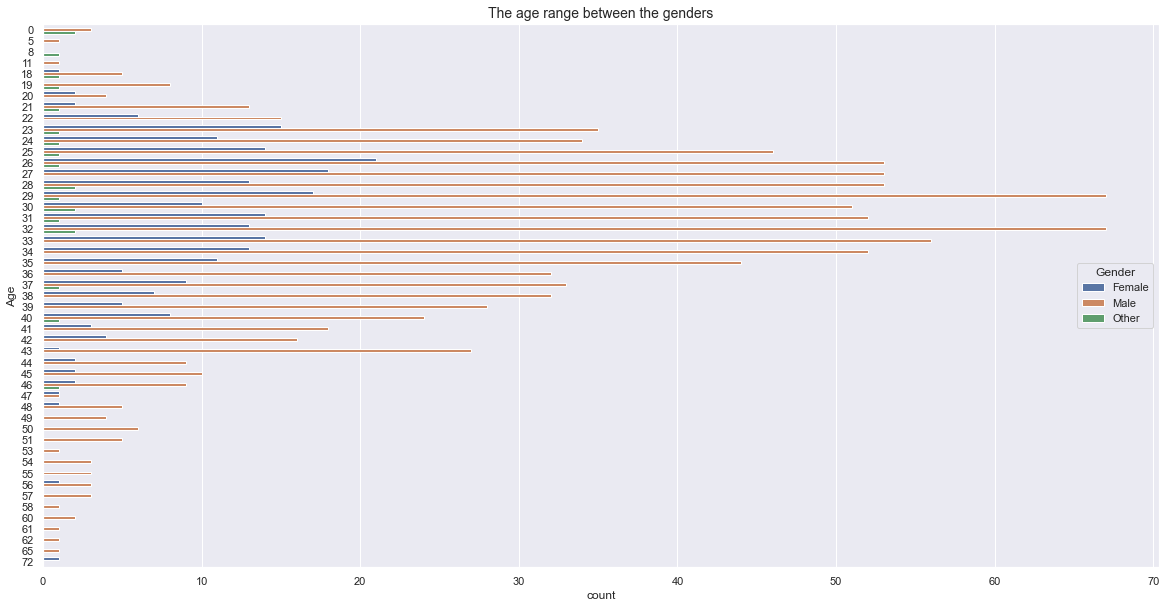

In [347]:
#using seaborn to visualize the age range between genders
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="darkgrid")
sns.countplot(y='Age',hue='Gender',data=df)
plt.title('The age range between the genders',fontsize=14)

- The main age working in tech are within their late 20's and early 30's
- The main gender working within tech are male by a large scale compared to the female and other gender
- The highest age surveyed amongst males were 29 and 32
- The highest age surveyed amongst females was 26
- The highest age surveyed amongst other were 28 30 and 32

Text(0.5, 1.0, 'Treatment within genders')

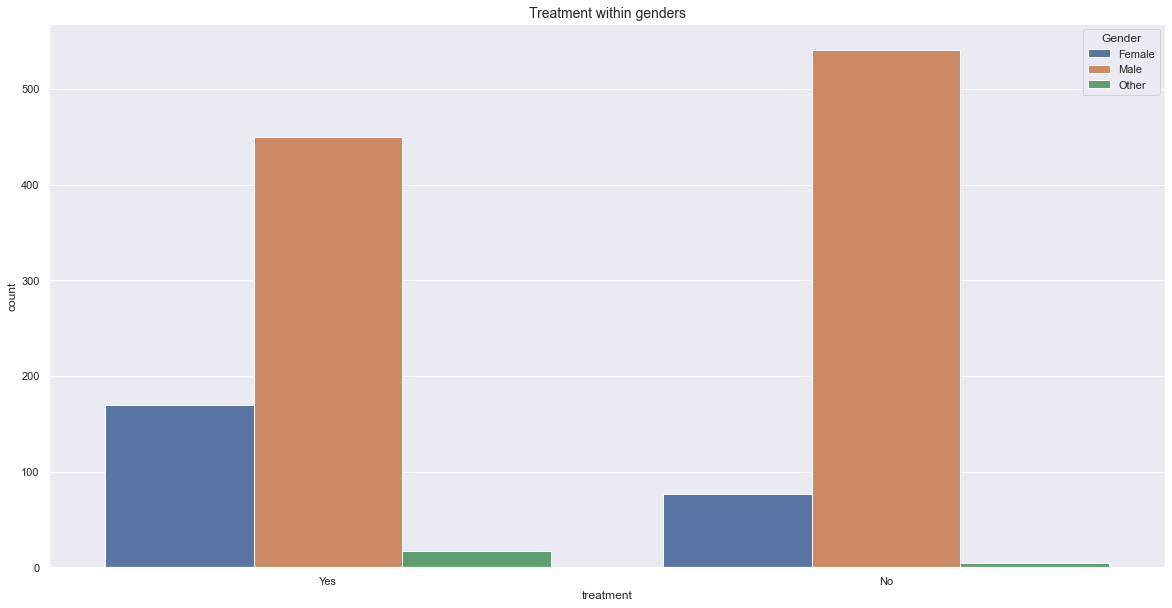

In [348]:
#wisualising a countplot using seaborn to see what gender sort after treatment
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="darkgrid")
sns.countplot(x='treatment',hue='Gender',data=df)
plt.title('Treatment within genders',fontsize=14)

            #Treatment: Have you sought treatment for a mental health condition?

- Most males don't have treatment for a mental health condition
- Most females and others have aquired treatment for a mental health condition
- Does this show the stereotype that males don't have the support to get treatment as much as the other genders?
- Once again it shows that tech has a larger male workforce, i wonder why?
- Whether or not the individual has sought treatment for a mental health condition doesnt neccessarily mean they have a condition or if they have better or worse conditions from seeking treatment 

Text(0.5, 1.0, 'Self-Employment within genders')

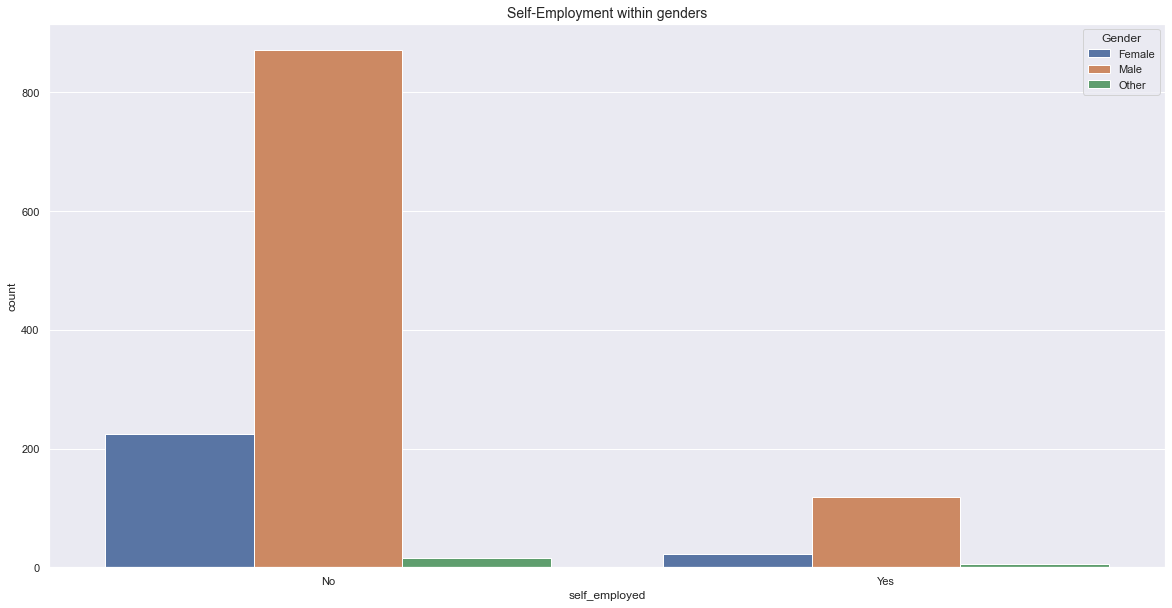

In [349]:
#how many gender were self employed 
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="darkgrid")
sns.countplot(x='self_employed',hue='Gender',data=df)
plt.title('Self-Employment within genders',fontsize=14)

            #Self_Employed: Are you self-employed?

- Most of the genders are not self-employed, does this affect the chance of having a mental health condition?
- Will being employed by a company effect the condition of someones mental health?
- Working with a company seems to be the higher choice amonghst the genders.


Text(0.5, 1.0, 'The family history within the genders')

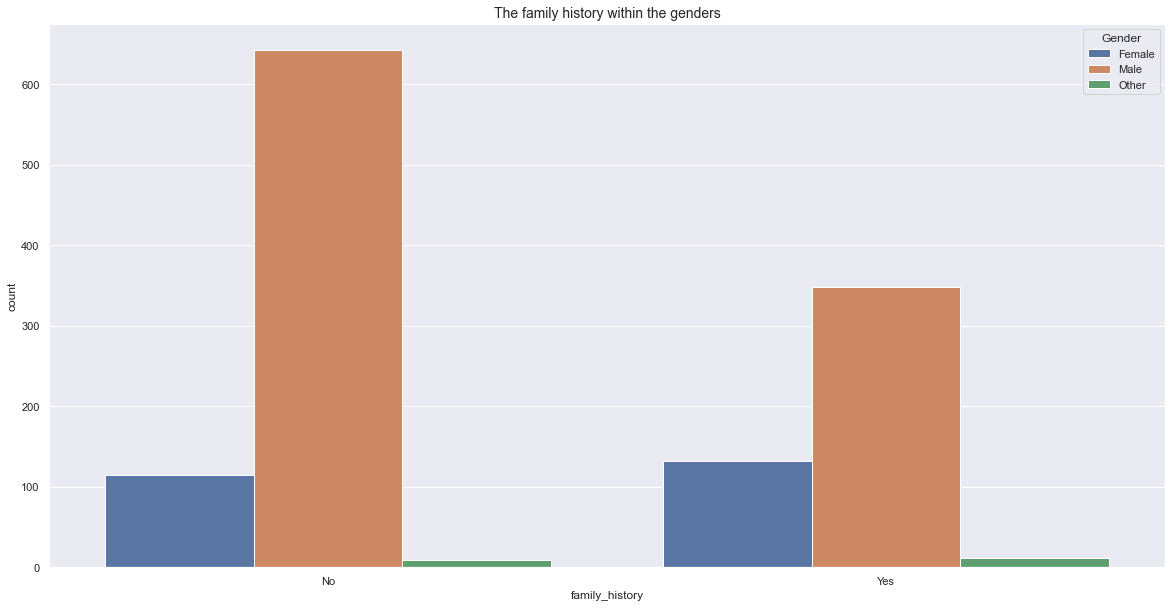

In [350]:
#to see what genders have a family history with mental(even plot)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="darkgrid")
sns.countplot(x='family_history',hue='Gender',data=df)
plt.title('The family history within the genders',fontsize=14)

            #Family_History: Do you have a family history of mental illness?

- There is a relatively equal amount of whether there is or isn't mental health within the family history in the female and other genders.
- There is a higher amount of males who say there isn't mental health in the family history, is this due to not knowing or the answer is no?


                                              Top countries

In [351]:
#to see what top countries had been surveyed  
top_countries=df['Country'].value_counts()[0:10]
top_countries

United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries surveyed')

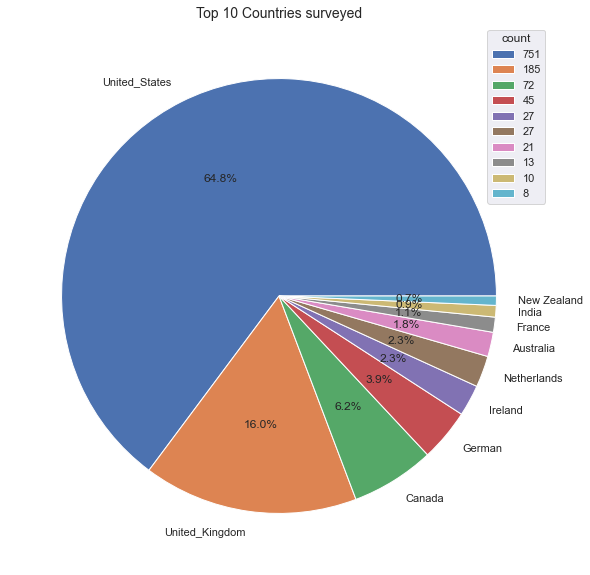

In [352]:
#to get a better visual of the information found
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="darkgrid")
labels=['United_States','United_Kingdom','Canada','German','Ireland','Netherlands','Australia','France','India','New Zealand']
data=[751,185,72,45,27,27,21,13,10,8]
plt.pie(data, labels = labels,autopct="%.1f%%")
plt.legend(data,title='count')
plt.title('Top 10 Countries surveyed',fontsize=14)

- The highest country surveyed is the United States, this wouldnt give a good representation of mental health amongst all the countries listed
- I wanted to see if a comparison of mental health within each country was worth the valuation but ive concluded not to.

In [353]:
#negative and positive help for mental health amongst genders

In [354]:
#accessing the 'Gender' group
df_2=df.loc[:,'Gender']
df_2


0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1254      Male
1255      Male
1256      Male
1257    Female
1258      Male
Name: Gender, Length: 1259, dtype: object

In [355]:
df_2.value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [356]:
#accessing one negative and positive column
df_3=df.loc[:,['obs_consequence','seek_help']]
df_3

,obs_consequence,seek_help
0,No,Yes
1,No,Don't know
2,No,No
3,Yes,No
4,No,Don't know
...,...,...
1254,No,No
1255,No,No
1256,No,No
1257,No,No


In [357]:
#merge df_2 and df_3
df_4=pd. merge(df_2, df_3, left_index=True, right_index=True)
df_4

,Gender,obs_consequence,seek_help
0,Female,No,Yes
1,Male,No,Don't know
2,Male,No,No
3,Male,Yes,No
4,Male,No,Don't know
...,...,...,...
1254,Male,No,No
1255,Male,No,No
1256,Male,No,No
1257,Female,No,No


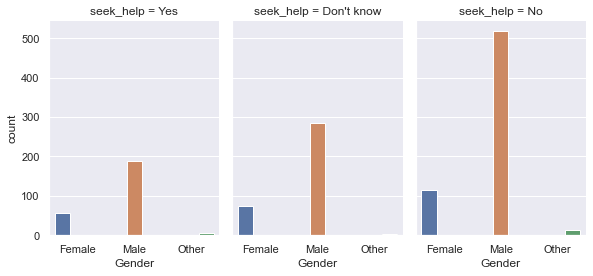

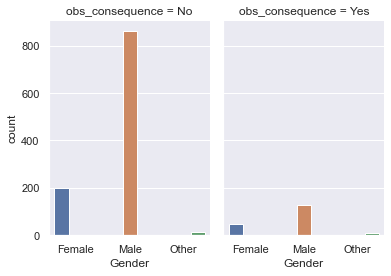

In [358]:
#a visualisation of each genders separate answers
sns.catplot(x="Gender", hue="Gender", col="seek_help",
                data=df_4, kind="count",
                height=4, aspect=.7)
sns.catplot(x="Gender", hue="Gender", col="obs_consequence",
                data=df_4, kind="count",
                height=4, aspect=.7)


#Seek_Help: Does your employer provide resources to learn more about mental health issues and how to seek help?

#Obs_Consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
    

- The highest amount employees have said that there employers don't provide resources to seek help

- There doesnt seem to be a high amount of employees who have heard of or observed negative consequences for coworkers with mental health in their workplace, maybe this is not discussed enough?

- The amount of employees who said that their emoployer does have resources to seek help seems quite low compared to the other answers which is a negative that needs to be highered.

- The amount of employees who don't know of resources need to change, maybe with mandatory meetings or an annual email sent to the employees to prevent any consequences from not having these resources
